<a href="https://colab.research.google.com/github/KamonohashiPerry/TensorFlow/blob/master/TensorFlowTutorial_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# TensorFlowのバージョンが古いのでアンイストール
!pip uninstall tensorflow

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
y
  Successfully uninstalled tensorflow-1.15.0


In [4]:
# TensorFlowのバージョンの新しいバージョンをインストール（終わったらランタイムの再起動を行う）
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 33kB/s 
     |████████████████████████████████| 450kB 48.4MB/s 
     |████████████████████████████████| 3.8MB 46.5MB/s 
     |████████████████████████████████| 81kB 13.3MB/s 
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# 写真のデータは28*28のNumPy array形式
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [10]:
# 中身は0から255までの値
print(train_images.min())
print(train_images.mean())
print(train_images.max())

0
72.94035223214286
255


In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
# ラベルごとの数をカウント
from collections import Counter, defaultdict
counts = defaultdict(int)

for l in train_labels:
    counts[l] += 1

In [14]:
counts

defaultdict(int,
            {0: 6000,
             1: 6000,
             2: 6000,
             3: 6000,
             4: 6000,
             5: 6000,
             6: 6000,
             7: 6000,
             8: 6000,
             9: 6000})

In [0]:
# クラス名
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

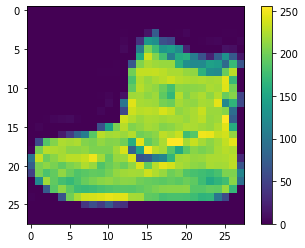

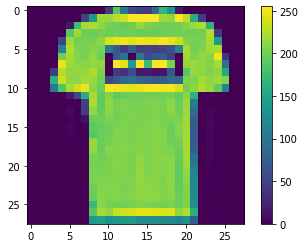

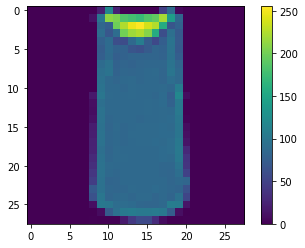

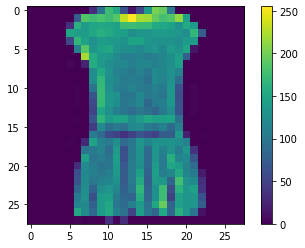

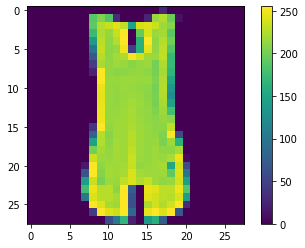

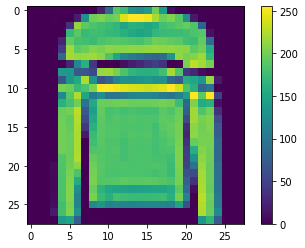

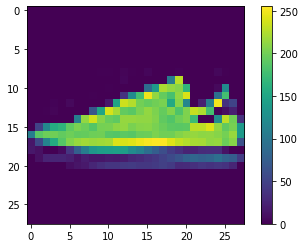

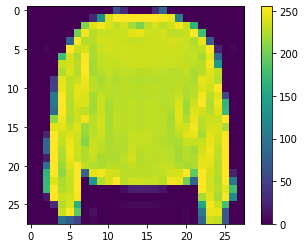

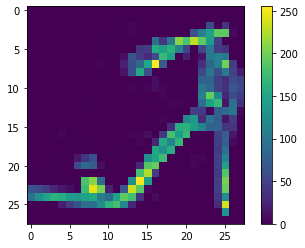

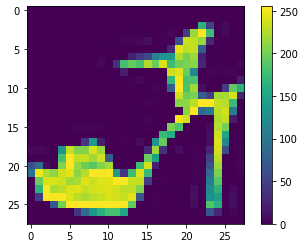

In [20]:
# 画像の表示
for i in range(10):
  plt.figure()
  plt.imshow(train_images[i])
  plt.colorbar()
  plt.grid(False)
  plt.show()

28*28なので結構荒く見える。

In [0]:
# scaleの調整
train_images = train_images / 255.0

test_images = test_images / 255.0

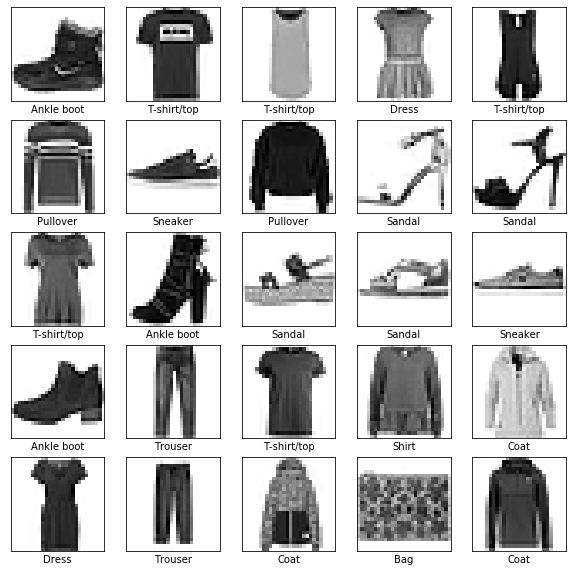

In [22]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
# モデルの構築
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)), # 画像データを1次元arrayに変換
                          keras.layers.Dense(128, activation='relu'), # 活性化関数（Rectified Linear Unit）
                          keras.layers.Dense(10, activation='softmax') # 10クラスに所属する確率を返す
                          ])

# モデルのコンパイル
# 損失関数：adam
# 最適化手法：スパースカテゴリカル・クロスエントロピー
# 評価指標：正解率
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# モデルの訓練
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.5008 - accuracy: 0.8243
Epoch 2/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3754 - accuracy: 0.8648
Epoch 3/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3373 - accuracy: 0.8774
Epoch 4/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3134 - accuracy: 0.8849
Epoch 5/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2946 - accuracy: 0.8921
Epoch 6/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2814 - accuracy: 0.8961
Epoch 7/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2691 - accuracy: 0.9007
Epoch 8/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2556 - accuracy: 0.9054
Epoch 9/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2472 - accuracy: 0.9085
Epoch 10/10
60

In [26]:
# 正解率の評価
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.3359 - accuracy: 0.8866

Test accuracy: 0.8866


In [0]:
# 予測
predictions = model.predict(test_images)

In [28]:
predictions.shape

(10000, 10)

In [29]:
predictions[0]

array([8.8823695e-09, 2.9286071e-10, 1.1714724e-10, 1.9242281e-10,
       1.3491488e-10, 5.0304083e-05, 2.0922557e-09, 2.2732165e-02,
       2.5403471e-08, 9.7721750e-01], dtype=float32)

In [30]:
np.argmax(predictions[0])

9

In [32]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

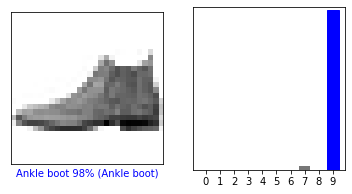

In [48]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

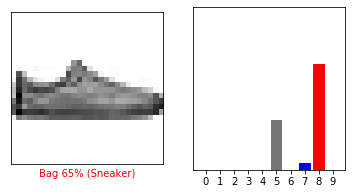

In [50]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

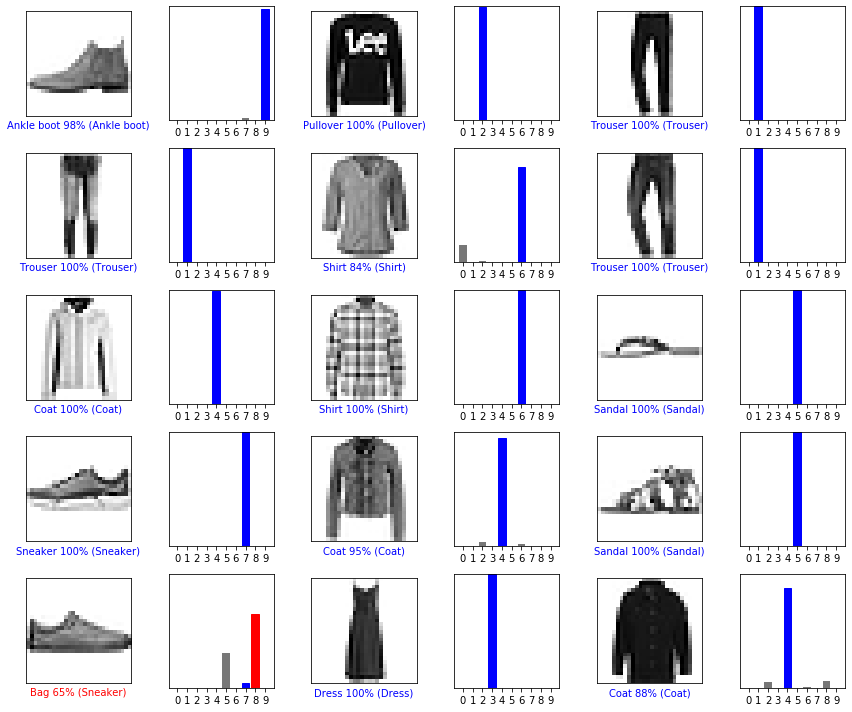

In [51]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [52]:
# 訓練したモデルを使った予測
img = test_images[1]

print(img.shape)

(28, 28)


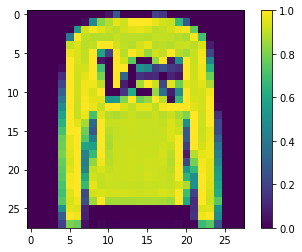

In [58]:
# 画像の表示
plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [53]:
# npのリストにしないと動かないので追加する
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [54]:
predictions_single = model.predict(img)

print(predictions_single)

[[7.4377502e-05 1.0655150e-12 9.9569404e-01 4.7776304e-08 2.5659823e-03
  8.9181329e-15 1.6654989e-03 6.4792214e-18 4.2546322e-08 2.3849906e-11]]


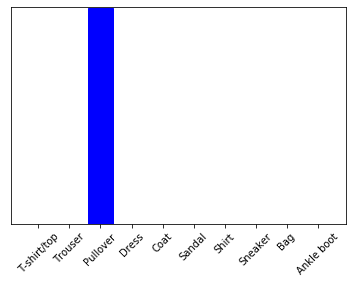

In [56]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [57]:
np.argmax(predictions_single[0])

2